In [56]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
# from mlxtend.feature_selection import SequentialFeatureSelector

In [57]:
# train = pd.read_csv('Training Data.csv')
# test = pd.read_csv('Test Data.csv')
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/TrainingData.csv')
test = pd.read_csv('/content/drive/MyDrive/TestData.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
train.sample(5)

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
219357,219358,6893004,72,12,single,rented,no,Aviator,Asansol,West_Bengal,9,13,0
85262,85263,2838734,58,14,single,rented,no,Chef,Khandwa,Madhya_Pradesh,5,10,1
218326,218327,25161,75,19,single,rented,no,Consultant,Sagar,Madhya_Pradesh,5,14,0
234487,234488,6664013,42,8,single,rented,no,Mechanical_engineer,Nangloi_Jat,Delhi,8,12,0
38219,38220,5736165,57,1,single,rented,no,Engineer,Nagaon,Assam,1,10,0


In [ ]:
test.sample(5)

,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
15135,15136,3125040,56,12,single,rented,no,Drafter,Sirsa,Haryana,11,13
4488,4489,4089865,71,11,single,rented,no,Computer hardware engineer,Ichalkaranji,Maharashtra,7,11
26016,26017,9370149,35,18,single,rented,no,Politician,Bulandshahr,Uttar Pradesh,6,11
27478,27479,9951774,40,12,single,rented,no,Hotel Manager,Secunderabad,Telangana,7,12
11138,11139,9568364,27,10,single,rented,no,Industrial Engineer,Dhanbad,Jharkhand,8,12


In [ ]:
train.shape

(252000, 13)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
train.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
train.nunique()

Id                     252000
income                  41917
age                        59
experience                 21
married                     2
house_ownership             3
car_ownership               2
profession                 51
city                      317
state                      29
current_job_years          15
current_house_years         5
risk_flag                   2
dtype: int64

In [ ]:
train.duplicated().value_counts()

False    252000
dtype: int64

In [59]:
train.rename(columns = {'married': 'martial_status'}, inplace = True)
test.rename(columns = {'married': 'martial_status'}, inplace = True)

In [ ]:
train["house_ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

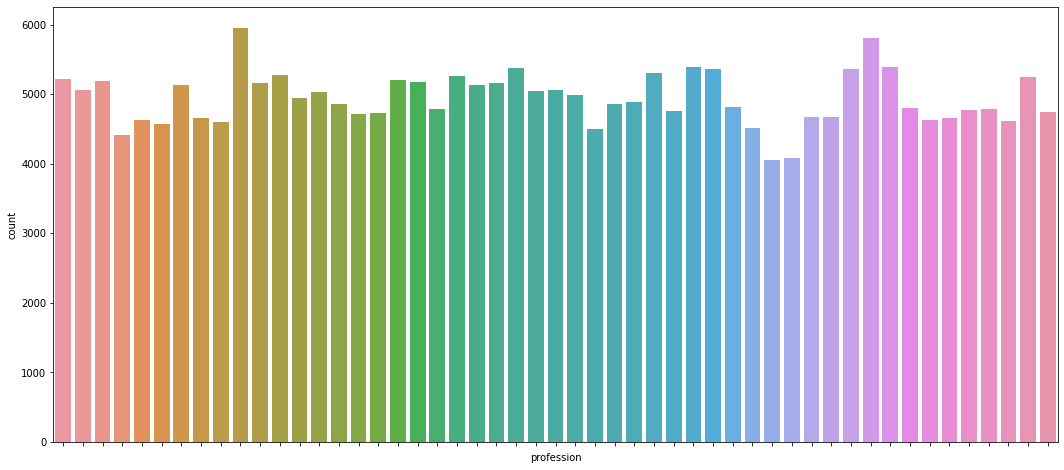

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data=train, x=train['profession']).set(xticklabels=[])
plt.show()

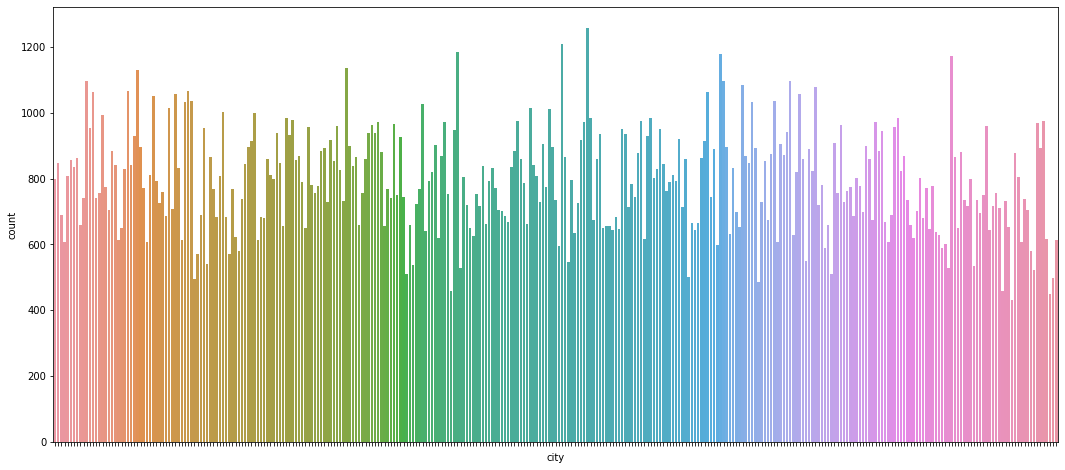

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data=train, x=train['city']).set(xticklabels=[])
plt.show()

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x=train['current_job_years'], y=train['current_house_years'], data=train)
plt.show()

NameError: ignored

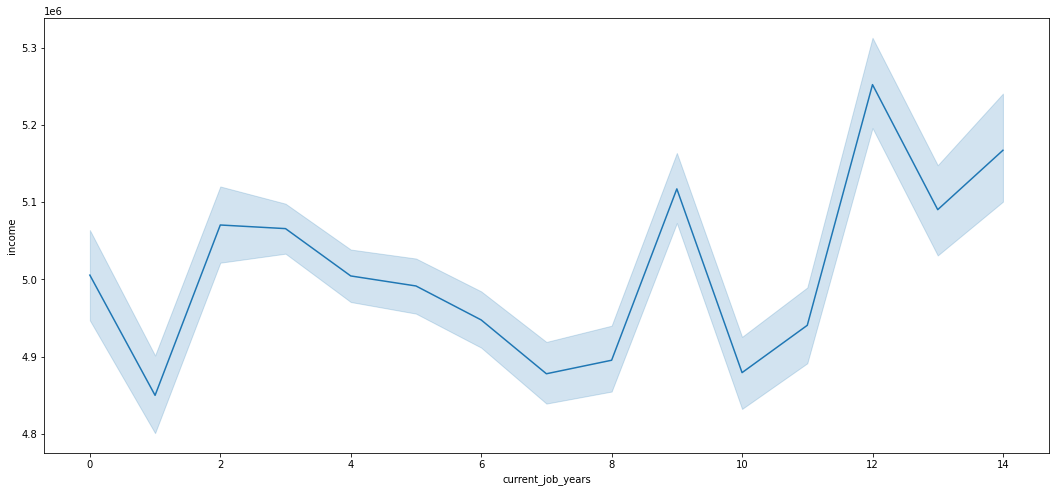

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x=train['current_job_years'], y=train['income'], data=train)
plt.show()

In [60]:
train = pd.concat([train,pd.get_dummies(train['martial_status'])],axis=1)
train = pd.concat([train,pd.get_dummies(train['house_ownership'])],axis=1)
train = pd.concat([train,pd.get_dummies(train['car_ownership'])],axis=1)

In [61]:
test = pd.concat([test,pd.get_dummies(test['martial_status'])],axis=1)
test = pd.concat([test,pd.get_dummies(test['house_ownership'])],axis=1)
test = pd.concat([test,pd.get_dummies(test['car_ownership'])],axis=1)

In [62]:
labelencoder = LabelEncoder()
train['profession_enc'] = labelencoder.fit_transform(train['profession'])
train['city_enc'] = labelencoder.fit_transform(train['city'])
train['state_enc'] = labelencoder.fit_transform(train['state'])

In [63]:
test['profession_enc'] = labelencoder.fit_transform(test['profession'])
test['city_enc'] = labelencoder.fit_transform(test['city'])
test['state_enc'] = labelencoder.fit_transform(test['state'])

In [64]:
train.drop(columns=['martial_status','house_ownership','car_ownership','profession','city','state','Id'],axis=1,inplace=True)

In [65]:
test.drop(columns=['martial_status','house_ownership','car_ownership','profession','city','state','id'],axis=1,inplace=True)

In [66]:
X = train.drop(columns="risk_flag",axis=1)
y = train['risk_flag']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

USING SMOTE

In [68]:
# import imblearn
import six
import sys
sys.modules['sklearn.externals.six'] = six

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 23)

In [69]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

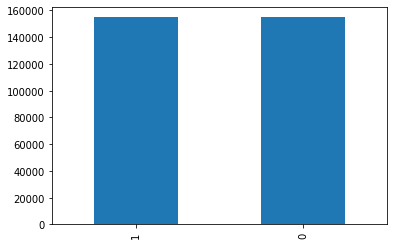

In [ ]:
pd.Series(y_train_new).value_counts().plot.bar()

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((176400, 15), (176400,), (75600, 15), (75600,))

In [ ]:
sfs = SequentialFeatureSelector(RandomForestClassifier(), 
           k_features=10, 
           forward=True, 
           floating=True,
           scoring='roc_auc',
           cv=2)

In [ ]:
sfs = sfs.fit(X_train, y|_train)

NameError: ignored

In [ ]:
selected_features = X.columns[list(sfs.k_feature_idx_)]

In [ ]:
selected_features

In [ ]:
print(sfs.k_score_)

In [ ]:
test

In [ ]:
rfc = RandomForestClassifier(n_estimators=23)

In [ ]:
rfc.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
roc_auc_score(y_test,predictions)

SMOTE RESULTS

In [ ]:
rfc.fit(X_train_new,y_train_new)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
roc_auc_score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66329
           1       0.51      0.81      0.62      9271

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.78     75600
weighted avg       0.91      0.88      0.89     75600

[[59137  7192]
 [ 1801  7470]]


0.8486545649692394

USING SVM SMOTE + feature selection


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [ ]:
feature_selector = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),
           min_features=6,
           max_features=8,
           scoring='roc_auc',
           print_progress=True,
           cv=2)

In [ ]:
features = feature_selector.fit(X_train, y_train)

In [ ]:
filtered_features= train_features.columns[list(features.k_feature_idx_)]
filtered_features

In [ ]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)

Takes 10m 6s for execution

In [ ]:
X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)

In [ ]:
# rfc1 = RandomForestClassifier(n_estimators=600)
rfc1 = RandomForestClassifier()

In [ ]:
rfc1.fit(X_oversample_svm,y_oversample_svm)
predictions1 = rfc1.predict(X_test)
print(classification_report(y_test,predictions1))
print(confusion_matrix(y_test,predictions1))
roc_auc_score(y_test,predictions1)

In [ ]:
predictions = rfc.predict(test)

In [ ]:
df = pd.DataFrame(predictions,columns=['risk_flag'])

In [ ]:
df.index += 1

In [ ]:
df = df.reset_index()

In [ ]:
df.rename(columns = {'index':'id'}, inplace = True)

In [ ]:
df.head()

,id,risk_flag
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
df.to_csv('submission.csv',index=False)
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
roc_auc_score(y_test,predictions)

In [ ]:
train.corr()

In [70]:
test.drop(columns=['experience','current_job_years','single','owned'],axis=1,inplace=True)

In [71]:
train.drop(columns=['experience','current_job_years','single','owned'],axis=1,inplace=True)

In [72]:
test.drop(columns=['no'],axis=1,inplace=True)

In [73]:
train.drop(columns=['no'],axis=1,inplace=True)

In [74]:
X = train.drop(columns="risk_flag",axis=1)
y = train['risk_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [ ]:
train

,income,age,current_house_years,risk_flag,married,norent_noown,rented,yes,profession_enc,city_enc,state_enc
0,1303835,23,13,0,0,0,1,0,33,251,13
1,7574516,40,13,0,0,0,1,0,43,227,14
2,3991815,66,10,0,1,0,1,0,47,8,12
3,6256451,41,12,1,0,0,1,1,43,54,17
4,5768871,47,14,1,0,0,1,0,11,296,22
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,11,0,0,0,1,0,45,162,28
251996,2843572,26,11,0,0,0,1,0,3,251,13
251997,4522448,46,12,0,0,0,1,0,17,144,14
251998,6507128,45,10,0,0,0,1,0,27,233,18


In [ ]:
X = train.drop(columns="risk_flag",axis=1)
y = train['risk_flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((176400, 10), (176400,), (75600, 10), (75600,))

SVM SMOTE for selected 10 features


In [ ]:
from imblearn.over_sampling import SVMSMOTE
svmsmote = SVMSMOTE(random_state = 101)

In [ ]:
X_oversample_svm, y_oversample_svm = svmsmote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rfc1 = RandomForestClassifier()

In [ ]:
rfc1.fit(X_oversample_svm,y_oversample_svm)
predictions1 = rfc1.predict(X_test)
print(classification_report(y_test,predictions1))
print(confusion_matrix(y_test,predictions1))
roc_auc_score(y_test,predictions1)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66329
           1       0.50      0.80      0.62      9271

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.77     75600
weighted avg       0.91      0.88      0.89     75600

[[58912  7417]
 [ 1827  7444]]


0.8455562522873208

In [ ]:
'income', 'age', 'current_house_years', 'married', 'norent_noown',
       'rented', 'yes', 'profession_enc', 'city_enc', 'state_enc'],
      dtype='object'

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
roc_auc_score(predictions,y_test)

In [ ]:
predictions

**Using Adaptive**

In [ ]:
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
adasyn = ADASYN(random_state = 33)

In [ ]:
X_oversample_ada, y_oversample_ada = adasyn.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier_rfc = RandomForestClassifier()

In [ ]:
classifier_rfc.fit(X_oversample_ada, y_oversample_ada)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(classification_report(y_test, classifier_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     66329
           1       0.50      0.81      0.62      9271

    accuracy                           0.88     75600
   macro avg       0.74      0.85      0.77     75600
weighted avg       0.91      0.88      0.89     75600



In [ ]:
predictions = classifier_rfc.predict(X_test)

In [ ]:
roc_auc_score(predictions,y_test)

0.7368789569528363

Borderline Smote


In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
bsmote = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_oversample_borderline, y_oversample_borderline = bsmote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
classifier_border = RandomForestClassifier()
classifier_border.fit(X_oversample_borderline, y_oversample_borderline)
predictions = classifier_border.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     66329
           1       0.53      0.72      0.61      9271

    accuracy                           0.89     75600
   macro avg       0.74      0.81      0.77     75600
weighted avg       0.91      0.89      0.89     75600



In [ ]:
roc_auc_score(predictions,y_test)

0.7438998286067732

In [75]:
!pip install lazypredict

In [76]:
import lazypredict

In [77]:
X_train_new1, X_test1, y_train_new1, y_test1 = train_test_split(X, y,test_size=.80,random_state =123)

In [78]:
print(X_train_new1.shape)
print(X_test1.shape)
print(y_train_new1.shape)
print(y_test1.shape)

(50400, 10)
(201600, 10)
(50400,)
(201600,)


In [79]:
X_train_new2, X_test2, y_train_new2, y_test2 = train_test_split(X_train_new1, y_train_new1,test_size=.3,random_state =123)

In [80]:
print(X_train_new2.shape)
print(X_test2.shape)
print(y_train_new2.shape)
print(y_test2.shape)

(35280, 10)
(15120, 10)
(35280,)
(15120,)


In [81]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [82]:
models,predictions = clf.fit(X_train_new2, X_test2, y_train_new2, y_test2)
print(models)

ImportError: ignored